In [1]:
import numpy as np
import pymc3 as pm
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
N = 10
num_gens = 49
dt = 0.1
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([7, 14, 28, 42, 49])

traj = create_trajectories(f0_vals, s_vals, times)

In [3]:
fitness_model = pm.Model()

time = times.reshape([-1, 5])

with fitness_model:
    s = pm.Flat("s", shape = (9, 1))
    print(s)
    f0 = pm.HalfFlat("f0", shape = (9, 1))
        
    f = f0 * pm.math.exp(s * time) / pm.math.sum(
        f0_vals[0] * pm.math.exp(s_vals[0] * time) + f0 * pm.math.exp(s * time),  axis = 0)
    
    
    f_obs = pm.Normal("f_obs", mu = f, sd = 1, observed = traj[1:, :])


s ~ Flat


In [6]:
f.type.ndim

2

In [7]:
map_estimate = pm.find_MAP(model=fitness_model)


In [8]:
print(map_estimate["s"][:,0])
print(s_vals)
print()
print(map_estimate["f0"][:,0])
print(f0_vals)
print()
print(map_estimate["s"][:, 0] - s_vals[1:])

[0.11266634 0.12021619 0.05926822 0.09332196 0.05505624 0.07474099
 0.06564231 0.1006319  0.07541486]
[0.08139372 0.09780189 0.08942335 0.04448576 0.07509489 0.0396431
 0.05497244 0.05058352 0.08457127 0.04633999]

[3.33558723 0.32563738 3.7215476  0.58717143 2.51067171 1.42917631
 3.52368658 1.14671244 0.69751112]
[0.37321488 0.63764041 0.12156486 0.70915488 0.12606958 0.48756235
 0.31644543 0.67653942 0.2286954  0.20063806]

[0.01486445 0.03079284 0.01478246 0.01822707 0.01541314 0.01976855
 0.01505879 0.01606063 0.02907487]


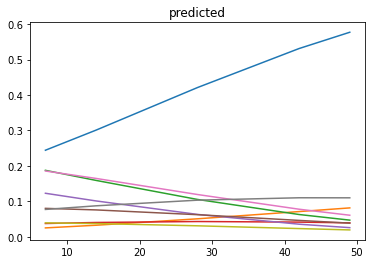

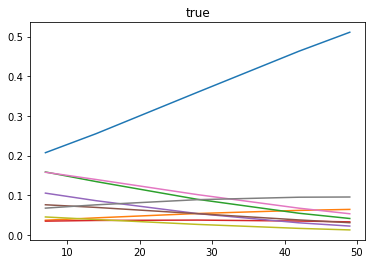

In [17]:
f_pred = map_estimate["f0"] * np.exp(map_estimate["s"] * times)
f_pred /= np.sum(f_pred, axis = 0)

plt.figure()
plt.plot(times, f_pred.T)
plt.title("predicted")

plt.figure()
plt.plot(times, traj[1:].T)
plt.title("true")
plt.show()

In [ ]:
with fitness_model:
    trace=pm.sample(5000, return_inferencedata=True)